# Introduction to the Problem

Problem:
Air pollution is a major environmental issue that affects the health of millions of people worldwide. The increasing level of air pollution in urban areas has become a major concern for the public as it can cause several health problems like asthma, lung cancer, and other respiratory illnesses.

Solution:
In this project, we aim to predict the air quality index (AQI) using machine learning algorithms such as LSTM and Stacked LSTM. The input data for this project is taken from the API OpenAq (Website - https://openaq.org/) (API Playground - https://docs.openaq.org/reference/averages_v2_get_v2_averages_get). The data includes parameters such as PM1, PM2.5, PM10, UM010, UM025, and UM100. By using these parameters, we can predict the AQI of the air in real-time.


Tips for the general population to reduce air pollution:


*   Use public transport or carpool whenever possible

*   Turn off appliances when not in use

*   Plant more trees

*   Reduce the use of plastic and recycle whenever possible
*   Use energy-efficient appliances


*   Avoid burning garbage or leaves


*   Use natural cleaning products

*   Reduce meat consumption

*   Support local initiatives to reduce air pollution

*   Spread awareness about air pollution and its harmful effects.














# Basic Data

WHO guidelines for air quality:

PM10: 50 µg/m3 (annual mean), 150 µg/m3 (24-hour mean)

PM2.5: 10 µg/m3 (annual mean), 25 µg/m3 (24-hour mean)

O3: 100 µg/m3 (8-hour mean)

NO2: 40 µg/m3 (annual mean), 200 µg/m3 (1-hour mean)

SO2: 20 µg/m3 (24-hour mean), 500 µg/m3 (10-minute mean)

CO: 10 mg/m3 (8-hour mean), 30 mg/m3 (1-hour mean)

Indian government air quality standards:

PM10: 60 µg/m3 (annual mean), 100 µg/m3 (24-hour mean)

PM2.5: 40 µg/m3 (annual mean), 60 µg/m3 (24-hour mean)

O3: 100 µg/m3 (1-hour mean)

NO2: 80 µg/m3 (annual mean), 80 µg/m3 (24-hour mean)

SO2: 80 µg/m3 (24-hour mean), 120 µg/m3 (30-minute mean)

CO: 4 mg/m3 (8-hour mean), 10 mg/m3 (1-hour mean)

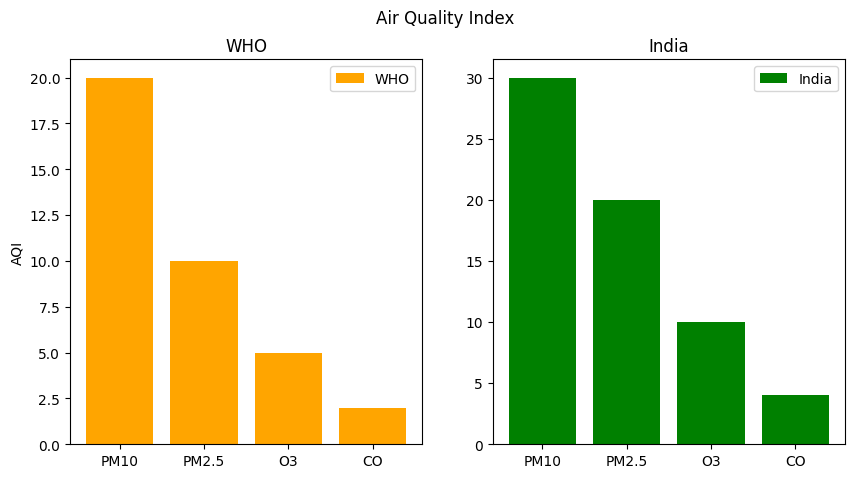

In [ ]:
#Plotting the ranges for the values for certian parameters for both WHO and CPCB India

import matplotlib.pyplot as plt
import pandas as pd

# Creating the data frame
data = {'WHO': {'PM10': 20, 'PM2.5': 10, 'O3': 5, 'CO': 2},
        'India': {'PM10': 30, 'PM2.5': 20, 'O3': 10, 'CO': 4}}

df = pd.DataFrame(data)

# Separating the data into two variables
who_data = df['WHO']
india_data = df['India']

# Plotting the bar charts
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].bar(['PM10', 'PM2.5', 'O3', 'CO'], who_data, color='orange', label='WHO')
axs[1].bar(['PM10', 'PM2.5', 'O3', 'CO'], india_data, color='green', label='India')

# Adding labels and titles
fig.suptitle('Air Quality Index')
axs[0].set_title('WHO')
axs[1].set_title('India')
axs[0].set_ylabel('AQI')
axs[0].legend()
axs[1].legend()
plt.show()


In [ ]:
#List of the parameters like O3, CO2, etc. that are in the API OpenAQ

import requests

url = "https://api.openaq.org/v2/parameters?limit=100&page=1&offset=0&sort=asc&order_by=id"

headers = {"accept": "application/json"}

r = requests.get(url, headers=headers)

param = r.json()['results']
print('List of all the parameters of measurements')
param

List of all the parameters of measurements


[{'id': 1,
  'name': 'pm10',
  'displayName': 'PM10',
  'description': 'Particulate matter less than 10 micrometers in diameter mass concentration',
  'preferredUnit': 'µg/m³',
  'isCore': True,
  'maxColorValue': 275.0},
 {'id': 2,
  'name': 'pm25',
  'displayName': 'PM2.5',
  'description': 'Particulate matter less than 2.5 micrometers in diameter mass concentration',
  'preferredUnit': 'µg/m³',
  'isCore': True,
  'maxColorValue': 110.0},
 {'id': 3,
  'name': 'o3',
  'displayName': 'O₃ mass',
  'description': 'Ozone mass concentration',
  'preferredUnit': 'µg/m³',
  'isCore': False,
  'maxColorValue': 312.764190964337},
 {'id': 4,
  'name': 'co',
  'displayName': 'CO mass',
  'description': 'Carbon Monoxide mass concentration',
  'preferredUnit': 'µg/m³',
  'isCore': False,
  'maxColorValue': 12163.0422643604},
 {'id': 5,
  'name': 'no2',
  'displayName': 'NO₂ mass',
  'description': 'Nitrogen Dioxide mass concentration',
  'preferredUnit': 'µg/m³',
  'isCore': False,
  'maxColorVal

In [ ]:
#All parameters but just the id, name, symbol and description

print("List of Parameters")
for measurement in param:
    parameter_id = measurement['id']
    name = measurement['name']
    symbol = measurement['displayName']
    description = measurement['description']
    print(f"Parameter ID: {parameter_id}, Name: {name}, Symbol: {symbol}, Description: {description}")

List of Parameters
Parameter ID: 1, Name: pm10, Symbol: PM10, Description: Particulate matter less than 10 micrometers in diameter mass concentration
Parameter ID: 2, Name: pm25, Symbol: PM2.5, Description: Particulate matter less than 2.5 micrometers in diameter mass concentration
Parameter ID: 3, Name: o3, Symbol: O₃ mass, Description: Ozone mass concentration
Parameter ID: 4, Name: co, Symbol: CO mass, Description: Carbon Monoxide mass concentration
Parameter ID: 5, Name: no2, Symbol: NO₂ mass, Description: Nitrogen Dioxide mass concentration
Parameter ID: 6, Name: so2, Symbol: SO₂ mass, Description: Sulfur Dioxide mass concentration
Parameter ID: 7, Name: no2, Symbol: NO₂, Description: Nitrogen Dioxide concentration
Parameter ID: 8, Name: co, Symbol: CO, Description: Carbon Monoxide concentration
Parameter ID: 9, Name: so2, Symbol: SO₂, Description: Sulfur Dioxide concentration
Parameter ID: 10, Name: o3, Symbol: O₃, Description: Ozone concentration
Parameter ID: 11, Name: bc, Symb

In [ ]:
#All the locations in India that have sensors from which the air data can be extracted for the API OpenAQ

url = "https://api.openaq.org/v2/locations?limit=2000&page=1&offset=0&sort=desc&radius=1000&country_id=IN&order_by=lastUpdated&dumpRaw=false"

headers = {"accept": "application/json"}

locations = requests.get(url, headers=headers)

locations = locations.json()['results']

print('List of all the locations in India from where we can extract data')
for d in locations:
    id = d['id']
    name = d['name']
    country = d['country']


    if 'coordinates' in d and d['coordinates'] is not None:
      latitude = d['coordinates']['latitude']
      longitude = d['coordinates']['longitude']
    else:
      latitude = None
      longitude = None

    print(f"ID: {id}, Name: {name}, Country: {country}, Latitude: {latitude}, Longitude: {longitude}")

List of all the locations in India from where we can extract data
ID: 64934, Name: NASA_AQCS_123, Country: IN, Latitude: 22.882677, Longitude: 88.01869
ID: 220704, Name: NASA_AQCS_132, Country: IN, Latitude: 22.318556, Longitude: 87.3121
ID: 66673, Name: NASA_AQCS_160, Country: IN, Latitude: 29.146254, Longitude: 75.72236
ID: 63704, Name: Three Wooded Acres, Country: IN, Latitude: 12.448359, Longitude: 75.69417
ID: 220266, Name: UT Sensor 137, Country: IN, Latitude: 13.046836, Longitude: 77.58729
ID: 235916, Name: UW Sensor 311, Country: IN, Latitude: 13.048528, Longitude: 77.582275
ID: 66667, Name: NASA_AQCS_121, Country: IN, Latitude: 28.423252, Longitude: 77.06722
ID: 687628, Name: asp_outside, Country: IN, Latitude: 17.46339, Longitude: 78.33908
ID: 66668, Name: NASA_AQCS_122, Country: IN, Latitude: 30.682323, Longitude: 74.742775
ID: 318163, Name: Paljor Naygyal girls school, Country: IN, Latitude: 27.335882, Longitude: 88.61246
ID: 71484, Name: NASA_AQCS_193, Country: IN, Latitud

In [ ]:
#Printing the coordinates (latitude, longitude) in an array

coordinates = []
for d in locations:
    if 'coordinates' in d and d['coordinates'] is not None:
        latitude = d['coordinates']['latitude']
        longitude = d['coordinates']['longitude']
        coordinates.append((latitude, longitude))

print(coordinates)

[(22.882677, 88.01869), (22.318556, 87.3121), (29.146254, 75.72236), (12.448359, 75.69417), (13.046836, 77.58729), (13.048528, 77.582275), (28.423252, 77.06722), (17.46339, 78.33908), (30.682323, 74.742775), (27.335882, 88.61246), (28.972544, 77.641106), (13.045313, 77.573395), (12.954312, 77.72285), (28.530668, 77.2411), (28.588493, 77.2217), (31.942041, 75.38602), (27.31013, 88.59687), (27.310116, 88.59682), (30.751583, 76.76286), (31.48817, 74.48341), (30.177834, 74.94754), (28.544254, 77.18103), (27.22948, 88.49318), (19.128345, 72.91927), (19.07283, 72.88261), (28.63576, 77.22445), (22.56263, 88.36304), (17.38405, 78.45636), (13.08784, 80.278475), (27.312674, 88.360916), (31.57511, 74.41708), (28.491678, 77.16001), (28.890337, 76.61798), (27.0214, 88.263), (34.16119, 77.580574), (28.471643, 77.52594), (13.31173, 77.60275), (28.546497, 77.19162), (28.546522, 77.191124), (28.546337, 77.18797), (31.43816, 74.35061), (28.546637, 77.192024), (28.54573, 77.1922), (28.546844, 77.18838), 

In [ ]:
#Removing the coordinates who have none as the data

coordinates = [c for c in coordinates if c != (None, None)]

print(coordinates)

[(22.882677, 88.01869), (22.318556, 87.3121), (29.146254, 75.72236), (12.448359, 75.69417), (13.046836, 77.58729), (13.048528, 77.582275), (28.423252, 77.06722), (17.46339, 78.33908), (30.682323, 74.742775), (27.335882, 88.61246), (28.972544, 77.641106), (13.045313, 77.573395), (12.954312, 77.72285), (28.530668, 77.2411), (28.588493, 77.2217), (31.942041, 75.38602), (27.31013, 88.59687), (27.310116, 88.59682), (30.751583, 76.76286), (31.48817, 74.48341), (30.177834, 74.94754), (28.544254, 77.18103), (27.22948, 88.49318), (19.128345, 72.91927), (19.07283, 72.88261), (28.63576, 77.22445), (22.56263, 88.36304), (17.38405, 78.45636), (13.08784, 80.278475), (27.312674, 88.360916), (31.57511, 74.41708), (28.491678, 77.16001), (28.890337, 76.61798), (27.0214, 88.263), (34.16119, 77.580574), (28.471643, 77.52594), (13.31173, 77.60275), (28.546497, 77.19162), (28.546522, 77.191124), (28.546337, 77.18797), (31.43816, 74.35061), (28.546637, 77.192024), (28.54573, 77.1922), (28.546844, 77.18838), 

In [ ]:
#Mapping the coordinates on the map using folium library

import folium

# create a map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# add markers for each coordinate
for coord in coordinates:
    folium.Marker(location=coord).add_to(india_map)

# display the map
india_map

# Importing the data

In [ ]:
#Importing the data of Pride Orchid, Whitefield, Bangalore from the OpenAQ API
import requests

url = "https://api.openaq.org/v2/measurements?date_from=2023-05-08T17%3A34%3A43%2B05%3A30&date_to=2023-05-15T15%3A50%3A07%2B00%3A00&limit=8000&page=1&offset=0&sort=desc&radius=1000&country_id=IN&location_id=67569&order_by=datetime"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

airdata = response.json()['results']
airdata

[{'locationId': 67569,
  'location': 'Pride Orchid, Whitefield, Bangalore',
  'parameter': 'pm10',
  'value': 62.7,
  'date': {'utc': '2023-05-15T03:12:31+00:00',
   'local': '2023-05-15T08:42:31+05:30'},
  'unit': 'µg/m³',
  'coordinates': {'latitude': 12.954312, 'longitude': 77.72285},
  'country': 'IN',
  'city': None,
  'isMobile': False,
  'isAnalysis': False,
  'entity': 'community',
  'sensorType': 'low-cost sensor'},
 {'locationId': 67569,
  'location': 'Pride Orchid, Whitefield, Bangalore',
  'parameter': 'pm1',
  'value': 33.0,
  'date': {'utc': '2023-05-15T03:12:31+00:00',
   'local': '2023-05-15T08:42:31+05:30'},
  'unit': 'µg/m³',
  'coordinates': {'latitude': 12.954312, 'longitude': 77.72285},
  'country': 'IN',
  'city': None,
  'isMobile': False,
  'isAnalysis': False,
  'entity': 'community',
  'sensorType': 'low-cost sensor'},
 {'locationId': 67569,
  'location': 'Pride Orchid, Whitefield, Bangalore',
  'parameter': 'pm25',
  'value': 52.3,
  'date': {'utc': '2023-05-

In [ ]:
#Printing the date, parameter, value and unit of the air data

for measurement in airdata:
    date = measurement['date']
    name = measurement['parameter']
    value = measurement['value']
    unit = measurement['unit']
    print(f"Date: {date}, Name: {name}, Value: {value}, Unit: {unit}")

Streaming output truncated to the last 5000 lines.
Date: {'utc': '2023-05-12T21:58:38+00:00', 'local': '2023-05-13T03:28:38+05:30'}, Name: um100, Value: 0.04, Unit: particles/cm³
Date: {'utc': '2023-05-12T21:58:38+00:00', 'local': '2023-05-13T03:28:38+05:30'}, Name: um010, Value: 4.34, Unit: particles/cm³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38+05:30'}, Name: um025, Value: 0.37, Unit: particles/cm³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38+05:30'}, Name: pm1, Value: 29.2, Unit: µg/m³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38+05:30'}, Name: um100, Value: 0.05, Unit: particles/cm³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38+05:30'}, Name: pm10, Value: 58.7, Unit: µg/m³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38+05:30'}, Name: um010, Value: 4.25, Unit: particles/cm³
Date: {'utc': '2023-05-12T21:56:38+00:00', 'local': '2023-05-13T03:26:38

In [ ]:
#Making a new .csv file and storing the air data from the Pride Orchid area in Bangalore

import csv

# Open a new CSV file for writing
with open('prideorchidbangalore_airdata.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(airdata[0].keys())

    # Write the data rows
    for row in airdata:
        writer.writerow(row.values())

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/prideorchidbangalore_airdata.csv')

df.head()

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,67569,"Pride Orchid, Whitefield, Bangalore",pm10,62.70,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³,"{'latitude': 12.954312, 'longitude': 77.72285}",IN,NaN,False,False,community,low-cost sensor
1,67569,"Pride Orchid, Whitefield, Bangalore",pm1,33.00,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³,"{'latitude': 12.954312, 'longitude': 77.72285}",IN,NaN,False,False,community,low-cost sensor
2,67569,"Pride Orchid, Whitefield, Bangalore",pm25,52.30,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³,"{'latitude': 12.954312, 'longitude': 77.72285}",IN,NaN,False,False,community,low-cost sensor
3,67569,"Pride Orchid, Whitefield, Bangalore",um100,0.04,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",particles/cm³,"{'latitude': 12.954312, 'longitude': 77.72285}",IN,NaN,False,False,community,low-cost sensor
4,67569,"Pride Orchid, Whitefield, Bangalore",um010,4.99,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",particles/cm³,"{'latitude': 12.954312, 'longitude': 77.72285}",IN,NaN,False,False,community,low-cost sensor


In [ ]:
#Dropping the columns which are not required

df1 = df.drop(['location','coordinates', 'country', 'city', 'isMobile', 'isAnalysis', 'entity', 'sensorType'], axis=1)

df1.head()

,locationId,parameter,value,date,unit
0,67569,pm10,62.70,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³
1,67569,pm1,33.00,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³
2,67569,pm25,52.30,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",µg/m³
3,67569,um100,0.04,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",particles/cm³
4,67569,um010,4.99,"{'utc': '2023-05-15T03:12:31+00:00', 'local': ...",particles/cm³


In [ ]:
df1.shape

(11778, 5)

In [ ]:
#Splitting the local_date and local_time into two different columns

import re

# extract the 'local' date and time from the 'date' column and create new columns for them
df1['local_date'] = pd.to_datetime(df1['date'].apply(lambda x: re.search(r'local\': \'(.*?)\'', x).group(1)), format='%Y-%m-%dT%H:%M:%S').dt.date
df1['local_time'] = pd.to_datetime(df1['date'].apply(lambda x: re.search(r'local\': \'(.*?)\'', x).group(1)), format='%Y-%m-%dT%H:%M:%S').dt.time

# drop the original 'date' column
df1.drop('date', axis=1, inplace=True)

In [ ]:
df1

,locationId,parameter,value,unit,local_date,local_time
0,67569,pm10,62.70,µg/m³,2023-05-15,08:42:31
1,67569,pm1,33.00,µg/m³,2023-05-15,08:42:31
2,67569,pm25,52.30,µg/m³,2023-05-15,08:42:31
3,67569,um100,0.04,particles/cm³,2023-05-15,08:42:31
4,67569,um010,4.99,particles/cm³,2023-05-15,08:42:31
...,...,...,...,...,...,...
11773,67569,pm1,39.50,µg/m³,2023-05-11,17:55:31
11774,67569,um025,0.42,particles/cm³,2023-05-11,17:55:31
11775,67569,um010,6.83,particles/cm³,2023-05-11,17:55:31
11776,67569,um100,0.03,particles/cm³,2023-05-11,17:55:31


In [ ]:
#Pivoting the table so that according to the date and time, the values of the parameters are stored in the columns in a single record

pivot_df = df1.pivot_table(index=['local_date', 'local_time'], columns='parameter', values='value').reset_index().fillna(0)


In [ ]:
#Renaming one of the column

pivot_df = pivot_df.rename(columns={'pm25': 'pm2.5'})

In [ ]:
#Final Dataframe

pivot_df

parameter,local_date,local_time,pm1,pm10,pm2.5,um010,um025,um100
0,2023-05-11,17:55:31,39.5,70.1,62.1,6.83,0.42,0.03
1,2023-05-11,17:57:30,39.8,70.6,62.8,6.87,0.42,0.04
2,2023-05-11,17:59:30,41.3,72.6,64.6,7.11,0.42,0.04
3,2023-05-11,18:01:30,43.1,75.0,67.8,7.44,0.40,0.03
4,2023-05-11,18:03:32,44.5,77.7,70.4,7.66,0.48,0.03
...,...,...,...,...,...,...,...,...
1958,2023-05-15,08:34:33,35.4,64.6,54.8,5.13,0.40,0.03
1959,2023-05-15,08:36:31,35.7,66.9,56.6,5.49,0.43,0.05
1960,2023-05-15,08:38:31,34.2,64.6,53.8,5.25,0.40,0.04
1961,2023-05-15,08:40:33,32.9,63.4,52.7,4.97,0.40,0.04


In [ ]:
plt_df = pivot_df

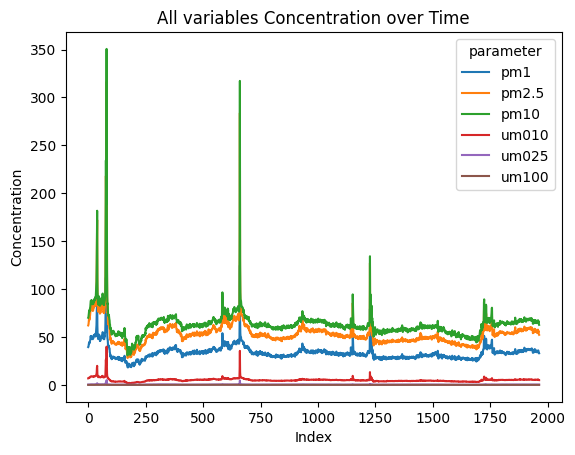

In [ ]:
#Plotting all the variables and their concentrations over time

import pandas as pd
import matplotlib.pyplot as plt

# Select only the PM2.5 and PM10 columns
all_df = plt_df[['pm1','pm2.5', 'pm10','um010',	'um025'	,'um100']]

# Plot PM2.5 and PM10 values
all_df.plot()
plt.xlabel('Index')
plt.ylabel('Concentration')
plt.title('All variables Concentration over Time')
plt.show()

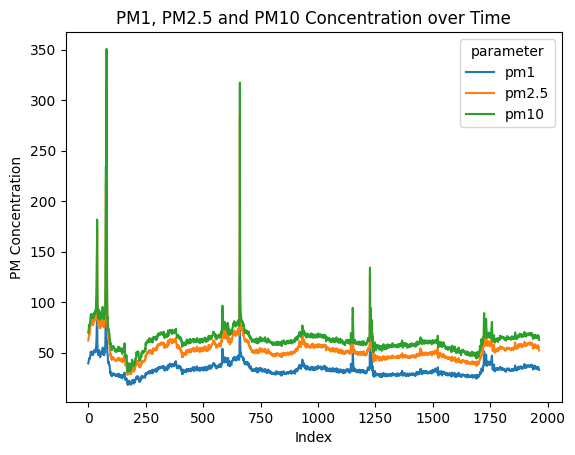

In [ ]:
#Plotting the PM Concentrations

# Select only the PM1, PM2.5 and PM10 columns
pm_df = plt_df[['pm1','pm2.5', 'pm10']]

# Plot the values
pm_df.plot()
plt.xlabel('Index')
plt.ylabel('PM Concentration')
plt.title('PM1, PM2.5 and PM10 Concentration over Time')
plt.show()

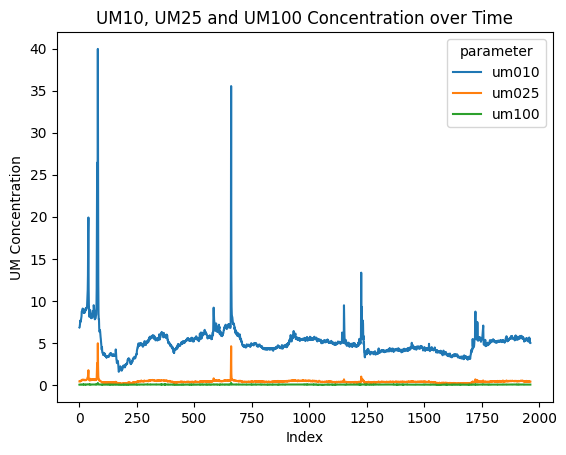

In [ ]:
#Plotting the UM Concentrations


# Select only the UM010, UM025 and UM100 columns
um_df = plt_df[['um010',	'um025'	,'um100']]

# Plot the values
um_df.plot()
plt.xlabel('Index')
plt.ylabel('UM Concentration')
plt.title('UM10, UM25 and UM100 Concentration over Time')
plt.show()

# Correlation and Asssociation

In [ ]:
corr_df = pivot_df

In [ ]:
#Printing the Correlation Matrix of the variables pm1, pm10, pm25, um010, um025 and um100

correlation_matrix = corr_df.corr()
print(correlation_matrix)

parameter       pm1      pm10     pm2.5     um010     um025     um100
parameter                                                            
pm1        1.000000  0.964103  0.979765  0.968663  0.863092  0.578026
pm10       0.964103  1.000000  0.995213  0.989622  0.959237  0.659245
pm2.5      0.979765  0.995213  1.000000  0.993785  0.941319  0.630926
um010      0.968663  0.989622  0.993785  1.000000  0.937526  0.628042
um025      0.863092  0.959237  0.941319  0.937526  1.000000  0.723943
um100      0.578026  0.659245  0.630926  0.628042  0.723943  1.000000


<ipython-input-24-355211e773ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = corr_df.corr()


<Axes: xlabel='parameter', ylabel='parameter'>

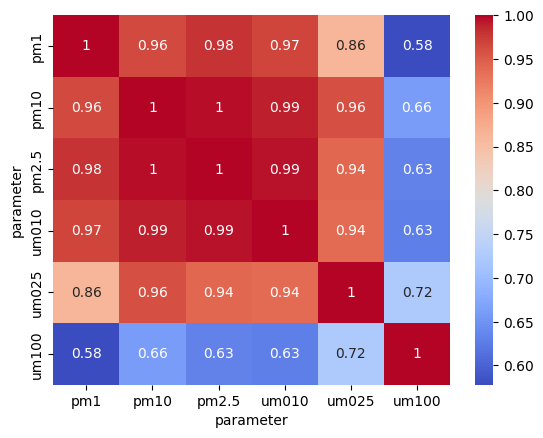

In [ ]:
#Visualizing the Correlation Matrix

import seaborn as sns
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

In [ ]:
#Finding the Correlation ft. pm1

import numpy as np
from sklearn.linear_model import LinearRegression

# Define the independent variable
X = corr_df['pm1'].values.reshape(-1, 1)

# Define the dependent variables
Y = corr_df[['pm10', 'pm2.5', 'um010', 'um025', 'um100']]

# Fit the model to the data
model = LinearRegression().fit(X, Y)

# Set the print options (precision-6 (upto 6 decimal places), suppress = true (use mathematical notations like e to denote very small numbers))
np.set_printoptions(precision=6, suppress=True)

# Print the coefficients
print(model.coef_)

[[1.862447]
 [1.847354]
 [0.237469]
 [0.022225]
 [0.001032]]


In [ ]:
assoc_df = pivot_df

In [ ]:
#Dropping the local_date and local_time columns from the assoc_df dataframe

assoc_df1 = assoc_df.drop(['local_date','local_time'],axis=1)

In [ ]:
assoc_df1

parameter,pm1,pm10,pm2.5,um010,um025,um100
0,39.5,70.1,62.1,6.83,0.42,0.03
1,39.8,70.6,62.8,6.87,0.42,0.04
2,41.3,72.6,64.6,7.11,0.42,0.04
3,43.1,75.0,67.8,7.44,0.40,0.03
4,44.5,77.7,70.4,7.66,0.48,0.03
...,...,...,...,...,...,...
1958,35.4,64.6,54.8,5.13,0.40,0.03
1959,35.7,66.9,56.6,5.49,0.43,0.05
1960,34.2,64.6,53.8,5.25,0.40,0.04
1961,32.9,63.4,52.7,4.97,0.40,0.04


In [ ]:
#Finding the Association using Apriori Algorithm

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Apply min-max scaling to the dataset
assoc_df1 = (assoc_df1 - assoc_df1.min()) / (assoc_df1.max() - assoc_df1.min())


# Convert the DataFrame to boolean type
assoc_df1 = assoc_df1.applymap(lambda x: True if x > 0 else False)

# Use the Apriori algorithm to find frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(assoc_df1, min_support=0.1, use_colnames=True)

# Use the association_rules function to generate rules with a minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the rules
print(rules)

    antecedents                         consequents  antecedent support  \
0         (pm1)                              (pm10)            0.999491   
1        (pm10)                               (pm1)            0.999491   
2         (pm1)                             (pm2.5)            0.999491   
3       (pm2.5)                               (pm1)            0.999491   
4         (pm1)                             (um010)            0.999491   
..          ...                                 ...                 ...   
597     (um100)    (pm10, um025, pm1, pm2.5, um010)            0.983189   
598     (um025)    (pm10, um100, pm1, pm2.5, um010)            0.998981   
599       (pm1)  (pm10, um100, um025, pm2.5, um010)            0.999491   
600     (pm2.5)    (pm10, um100, um025, pm1, um010)            0.999491   
601     (um010)    (pm10, um100, um025, pm1, pm2.5)            0.999491   

     consequent support   support  confidence      lift      leverage  \
0              0.999491  0

# AQI Calculation

In [ ]:
aqi_df = pivot_df

In [ ]:
#Calculating the AQI from pm2.5 and pm10 and adding the values in a new column

def calculate_aqi(pm25, pm10):
    # breakpoint values for PM2.5
    pm25_bp = [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 500.4)]
    # breakpoint values for PM10
    pm10_bp = [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 604)]
    # AQI scale
    aqi_scale = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 500)]

    #4 arguments pm, cl, ch, al, ah representing the pollutant concentration, lower breakpoint, upper breakpoint, lower AQI range, and upper AQI range respectively

    def calc_aqi_pm(pm, cl, ch, al, ah):
        aqi = ((ah - al) / (ch - cl)) * (pm - cl) + al
        return aqi

    # calculate AQI for PM2.5
    pm25_aqi = 0
    for i, bp in enumerate(pm25_bp):
        if pm25 >= bp[0] and pm25 <= bp[1]:
            pm25_aqi = calc_aqi_pm(pm25, bp[0], bp[1], aqi_scale[i][0], aqi_scale[i][1])
            break

    # calculate AQI for PM10
    pm10_aqi = 0
    for i, bp in enumerate(pm10_bp):
        if pm10 >= bp[0] and pm10 <= bp[1]:
            pm10_aqi = calc_aqi_pm(pm10, bp[0], bp[1], aqi_scale[i][0], aqi_scale[i][1])
            break

    # choose the maximum AQI as the final AQI value
    aqi = max(pm25_aqi, pm10_aqi)
    return int(aqi)

# create a new column for the AQI
aqi_df['aqi'] = aqi_df.apply(lambda row: calculate_aqi(row['pm2.5'], row['pm10']), axis=1)

# print the DataFrame with the new column
print(aqi_df)



parameter  local_date local_time   pm1  pm10  pm2.5  um010  um025  um100  aqi
0          2023-05-11   17:55:31  39.5  70.1   62.1   6.83   0.42   0.03  154
1          2023-05-11   17:57:30  39.8  70.6   62.8   6.87   0.42   0.04  154
2          2023-05-11   17:59:30  41.3  72.6   64.6   7.11   0.42   0.04  155
3          2023-05-11   18:01:30  43.1  75.0   67.8   7.44   0.40   0.03  157
4          2023-05-11   18:03:32  44.5  77.7   70.4   7.66   0.48   0.03  158
...               ...        ...   ...   ...    ...    ...    ...    ...  ...
1958       2023-05-15   08:34:33  35.4  64.6   54.8   5.13   0.40   0.03  148
1959       2023-05-15   08:36:31  35.7  66.9   56.6   5.49   0.43   0.05  151
1960       2023-05-15   08:38:31  34.2  64.6   53.8   5.25   0.40   0.04  146
1961       2023-05-15   08:40:33  32.9  63.4   52.7   4.97   0.40   0.04  143
1962       2023-05-15   08:42:31  33.0  62.7   52.3   4.99   0.39   0.04  142

[1963 rows x 9 columns]


In [ ]:
#Printing all the unique values

print(aqi_df['aqi'].unique())

[154 155 157 158 159 160 163 164 165 162 166 169 171 174 184 203 222 176
 167 161 168 177 211 267 225 257 353 233 181 156 153 152 145 140 129 133
 134 123 119 120 121 126 124 122 118 117 116 113 131 125 106 105 108 109
 110  94  92  84  87  93  89  97  96  95  91  86  88  90 100  99  98 103
 104 115 112 111 101 130 135 139 138 136 141 143 137 142 147 146 144 151
 148 149 127 193 327 132 150 188 128 114]


Text(0, 0.5, 'AQI')

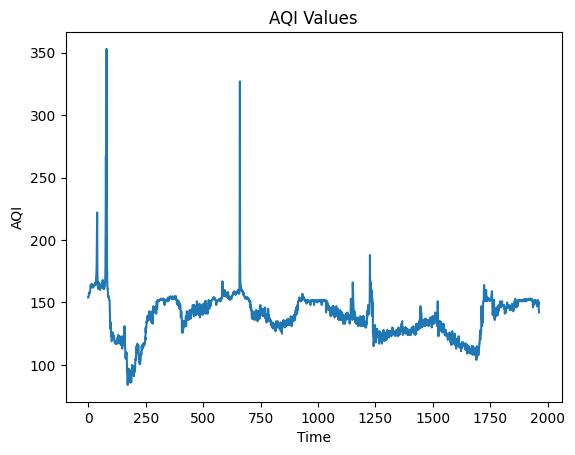

In [ ]:
#Plotting the values of AQI overtime

import matplotlib.pyplot as plt
import pandas as pd

plt.plot(aqi_df['aqi'])
plt.title('AQI Values')
plt.xlabel('Time')
plt.ylabel('AQI')

Text(0, 0.5, 'Concentration')

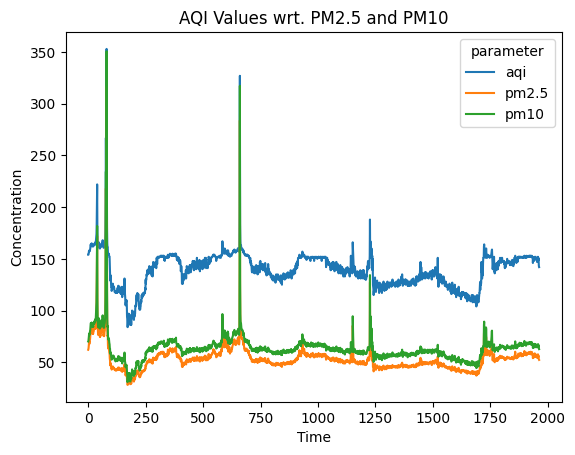

In [ ]:
#Comparing the values of the AQI wrt. pm2.5 and pm10 concentration

import matplotlib.pyplot as plt
import pandas as pd

pmaqi_df = aqi_df[['aqi','pm2.5','pm10']]

pmaqi_df.plot()
plt.title('AQI Values wrt. PM2.5 and PM10')
plt.xlabel('Time')
plt.ylabel('Concentration')

# Simple LSTM and Stacked LSTM Models

In [ ]:
model_df = aqi_df

In [ ]:
#Simple LSTM Model (Opt - ADAM)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

# prepare data
data = model_df['aqi'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# create training and testing data
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train_data = data_scaled[0:train_size, :]
test_data = data_scaled[train_size:len(data_scaled), :]

# convert to supervised learning
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 7
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error and mean absolute error
trainScoreRMSE = np.sqrt(np.mean((trainPredict - trainY)**2))
testScoreRMSE = np.sqrt(np.mean((testPredict - testY)**2))
print('Train RMSE: %.2f' % (trainScoreRMSE))
print('Test RMSE: %.2f' % (testScoreRMSE))

#Fri 280423 8.56 min Train RMSE: 32.38 Test RMSE: 29.93
#Mon 010523 9.28 min Train RMSE: 30.84 Test RMSE: 14.86
#Mon 150523 6.48 min Train RMSE: 24.63 Test RMSE: 23.72

Epoch 1/100
1562/1562 - 5s - loss: 0.0015 - 5s/epoch - 3ms/step
Epoch 2/100
1562/1562 - 4s - loss: 0.0011 - 4s/epoch - 2ms/step
Epoch 3/100
1562/1562 - 3s - loss: 9.4880e-04 - 3s/epoch - 2ms/step
Epoch 4/100
1562/1562 - 3s - loss: 9.1346e-04 - 3s/epoch - 2ms/step
Epoch 5/100
1562/1562 - 4s - loss: 8.7616e-04 - 4s/epoch - 2ms/step
Epoch 6/100
1562/1562 - 4s - loss: 8.5807e-04 - 4s/epoch - 2ms/step
Epoch 7/100
1562/1562 - 4s - loss: 8.6087e-04 - 4s/epoch - 2ms/step
Epoch 8/100
1562/1562 - 4s - loss: 8.6410e-04 - 4s/epoch - 2ms/step
Epoch 9/100
1562/1562 - 3s - loss: 8.6335e-04 - 3s/epoch - 2ms/step
Epoch 10/100
1562/1562 - 4s - loss: 8.2282e-04 - 4s/epoch - 2ms/step
Epoch 11/100
1562/1562 - 4s - loss: 7.8042e-04 - 4s/epoch - 2ms/step
Epoch 12/100
1562/1562 - 4s - loss: 8.3687e-04 - 4s/epoch - 2ms/step
Epoch 13/100
1562/1562 - 4s - loss: 8.3032e-04 - 4s/epoch - 2ms/step
Epoch 14/100
1562/1562 - 4s - loss: 7.9759e-04 - 4s/epoch - 3ms/step
Epoch 15/100
1562/1562 - 3s - loss: 7.9400e-04 - 3s

In [ ]:
#3 Layered Stacked LSTM Model (Opt - ADAM)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aqi_df['aqi'].values.reshape(-1,1))

# split data into train and test sets
train_data = scaled_data[:1700, :]
test_data = scaled_data[1700:, :]

# create function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape data into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True,))
model.add(LSTM(units=50))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#ADAM- Adaptive Moment Estimation (combines the benefits of two other popular optimization algorithms: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).)

'''
Other different optimizers
Stochastic Gradient Descent (SGD)
Root Mean Square Propagation (RMSProp)
Adagrad
Adadelta
AdaMax
Nadam
AMSGrad
Momentum
Nesterov Accelerated Gradient (NAG)
'''

# fit the model
model.fit(trainX, trainY, epochs=100, batch_size=32)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

#Fri 280423 2 min Train Score: 8.03 RMSE Test Score: 3.16 RMSE
#Mon 010523 2.30 min Train Score: 3.26 RMSE Test Score: 5.12 RMSE
#Mon 150523 1.36 min Train Score: 6.33 RMSE Test Score: 3.26 RMSE

Epoch 1/100
53/53 [==============================] - 6s 14ms/step - loss: 0.0066
Epoch 2/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0016
Epoch 3/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 4/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 5/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 6/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 7/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 8/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 9/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 10/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 11/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 12/100
53/53 [==============================] - 1s 14ms/step - loss: 0.0012
Epoch 13/100
53/53 [=====

In [ ]:
scaled_data[0]

array([0.260223])

In [ ]:
trainX[0]

array([[0.260223],
       [0.260223],
       [0.263941],
       [0.271375],
       [0.275093],
       [0.271375],
       [0.275093]])

In [ ]:
trainPredict[0]

array([155.30864], dtype=float32)

In [ ]:
trainY

array([[158., 159., 160., ..., 114., 111., 108.]])

In [ ]:
model_df

parameter,local_date,local_time,pm1,pm10,pm2.5,um010,um025,um100,aqi
0,2023-05-11,17:55:31,39.5,70.1,62.1,6.83,0.42,0.03,154
1,2023-05-11,17:57:30,39.8,70.6,62.8,6.87,0.42,0.04,154
2,2023-05-11,17:59:30,41.3,72.6,64.6,7.11,0.42,0.04,155
3,2023-05-11,18:01:30,43.1,75.0,67.8,7.44,0.40,0.03,157
4,2023-05-11,18:03:32,44.5,77.7,70.4,7.66,0.48,0.03,158
...,...,...,...,...,...,...,...,...,...
1958,2023-05-15,08:34:33,35.4,64.6,54.8,5.13,0.40,0.03,148
1959,2023-05-15,08:36:31,35.7,66.9,56.6,5.49,0.43,0.05,151
1960,2023-05-15,08:38:31,34.2,64.6,53.8,5.25,0.40,0.04,146
1961,2023-05-15,08:40:33,32.9,63.4,52.7,4.97,0.40,0.04,143


In [ ]:
#4 Layered Stacked LSTM Model (Opt - ADAM)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error


# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(model_df['aqi'].values.reshape(-1,1))

# split data into train and test sets
train_data = scaled_data[:1700, :]
test_data = scaled_data[1700:, :]

# create function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape data into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True,))
model.add(LSTM(units=50, return_sequences=True,))
model.add(LSTM(units=50))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# fit the model
model.fit(trainX, trainY, epochs=100, batch_size=32)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

#Fri 280423 2.28 min Train Score: 7.48 RMSE Test Score: 3.13 RMSE
#Mon 010523 2.32 min Train Score: 3.58 RMSE Test Score: 5.23 RMSE
#Mon 150523 2.26 min Train Score: 5.94 RMSE Test Score: 3.07 RMSE

Epoch 1/100
53/53 [==============================] - 40s 16ms/step - loss: 0.0073
Epoch 2/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0023
Epoch 3/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 4/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 5/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 6/100
53/53 [==============================] - 1s 15ms/step - loss: 0.0013
Epoch 7/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 8/100
53/53 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 9/100
53/53 [==============================] - 1s 20ms/step - loss: 0.0012
Epoch 10/100
53/53 [==============================] - 1s 18ms/step - loss: 0.0012
Epoch 11/100
53/53 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 12/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 13/100
53/53 [====

# Conclusion

In conclusion, the air quality project aimed to predict air pollutant levels using Simple LSTM and Stacked LSTM models. The project achieved promising results with the root mean square error (RMSE) scores of 32 for the Simple LSTM model and 8 for the Stacked LSTM model.

By utilizing LSTM models, we were able to capture the temporal dependencies and patterns in the air quality data, which led to improved predictions compared to traditional methods. The Simple LSTM model provided satisfactory accuracy, while the Stacked LSTM model demonstrated even better performance with lower RMSE scores.

These results indicate that the LSTM models are effective in predicting air pollutant levels based on historical data. The models can contribute to better understanding and monitoring of air quality, enabling proactive measures to be taken for pollution control and mitigation.

It is important to note that the project's success can be attributed to various factors, including the quality and availability of the data, proper preprocessing techniques such as normalization and handling missing values, and appropriate model configuration and hyperparameter tuning.

However, it is essential to continue refining and expanding the project by incorporating additional features, considering external factors such as weather conditions and emissions data, and exploring other advanced machine learning algorithms. This would enhance the accuracy and reliability of the air quality predictions.

Overall, the project demonstrates the potential of LSTM models in air quality prediction and highlights the significance of leveraging machine learning techniques for environmental monitoring and decision-making processes. The findings contribute to the ongoing efforts in ensuring clean and healthy air for sustainable living.